In [68]:
%matplotlib inline
import itertools
from time import time
import csv


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from kifmm_py import KiFmm

# Contents
- [Single Precision](#single-precision)
- [Double Precision](#double-precision)

# Single Precision

### BLAS Field Translations

In [69]:
# np.random.seed(0)
# surface_diff_vec = [0, 1, 2]
# svd_threshold_vec = [None, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 2e-2]
# depth_vec = [4, 5]
# expansion_order_vec = [3, 4, 5, 6]

# parameters = list(itertools.product(surface_diff_vec, svd_threshold_vec, depth_vec, expansion_order_vec))

# dim = 3
# dtype = np.float32
# ctype = np.complex64

# # Set FMM Parameters
# n_vec = 1
# n_crit = None
# depth = 3
# n_sources = 1000000
# n_targets = 1000000
# kernel = "laplace" 
# field_translation = "blas"  
# kernel_eval_type = (
#     "eval"  
# )

# sources = np.reshape(
#     np.random.rand(n_sources * dim), (n_sources, dim)
# ).astype(dtype)
# targets = np.reshape(
#     np.random.rand(n_targets * dim), (n_targets, dim)
# ).astype(dtype)
# charges = np.reshape(
#     np.random.rand(n_sources * n_vec), (n_sources, n_vec)
# ).astype(dtype)

# rel_error = []
# times = []
# setup = []

# for (i, (surface_diff, svd_threshold, depth, expansion_order)) in enumerate(parameters):
#     tmp = [expansion_order]*(depth+1)

#     s = time()
#     fmm = KiFmm(
#         tmp,
#         sources,
#         targets,
#         charges,
#         kernel_eval_type,
#         kernel,
#         field_translation,
#         prune_empty=True,
#         timed=True,
#         svd_threshold=svd_threshold,
#         surface_diff=surface_diff,
#         depth=depth
#     )
#     setup.append(time()-s)

#     s = time()
#     fmm.evaluate()
#     times.append(time()-s)
#     print(f"Computing: {i+1}/{len(parameters)} Eval Time: {times[i]}")
        
#     leaf = fmm.target_leaves[1]
#     found = fmm.potentials(leaf)[0]
#     targets_leaf = fmm.target_coordinates(leaf)
#     expected = fmm.evaluate_kernel(sources, targets_leaf, charges)

#     relative_error = np.abs(expected-found)/expected

#     max_relative_error = np.max(relative_error)
#     min_relative_error = np.min(relative_error)
#     mean_relative_error = np.mean(relative_error)

#     rel_error.append((min_relative_error, mean_relative_error, max_relative_error))


# with open('accuracy_single_precision_blas.csv', mode='w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(['surface_diff', 'svd_threshold', 'depth', 'expansion_order', 'time', 'min_rel_err', 'mean_rel_err', 'max_rel_err'])
#     for row in zip(parameters, times, rel_error):
#         writer.writerow([row[0][0], row[0][1], row[0][2], row[0][3], row[1], row[2][0], row[2][1], row[2][2]])

### FFT Field Translations

In [70]:
# np.random.seed(0)

# depth_vec = [4, 5]
# expansion_order_vec = [3, 4, 5, 6, 7, 8]

# parameters = list(itertools.product(depth_vec, expansion_order_vec))

# np.random.seed(0)

# dim = 3
# dtype = np.float32
# ctype = np.complex64

# # Set FMM Parameters
# n_vec = 1
# n_crit = None
# n_sources = 1000000
# n_targets = 1000000
# kernel = "laplace" 
# field_translation = "fft"  
# kernel_eval_type = (
#     "eval"  
# )

# sources = np.reshape(
#     np.random.rand(n_sources * dim), (n_sources, dim)
# ).astype(dtype)
# targets = np.reshape(
#     np.random.rand(n_targets * dim), (n_targets, dim)
# ).astype(dtype)
# charges = np.reshape(
#     np.random.rand(n_sources * n_vec), (n_sources, n_vec)
# ).astype(dtype)

# rel_error = []
# times = []
# setup = []


# for (i, (depth, expansion_order)) in enumerate(parameters):
#     tmp = [expansion_order]*(depth+1)
#     s = time()
#     fmm = KiFmm(
#         tmp,
#         sources,
#         targets,
#         charges,
#         kernel_eval_type,
#         kernel,
#         field_translation,
#         prune_empty=True,
#         timed=True,
#         depth=depth
#     )
#     setup.append(time()-s)

#     s = time()
#     fmm.evaluate()
#     times.append(time()-s)
#     print(f"Computing: {i+1}/{len(parameters)} Eval Time: {times[i]}")
        
#     leaf = fmm.target_leaves[1]
#     found = fmm.potentials(leaf)[0]
#     targets_leaf = fmm.target_coordinates(leaf)
#     expected = fmm.evaluate_kernel(sources, targets_leaf, charges)

#     relative_error = np.abs(expected-found)/expected

#     max_relative_error = np.max(relative_error)
#     min_relative_error = np.min(relative_error)
#     mean_relative_error = np.mean(relative_error)

#     rel_error.append((min_relative_error, mean_relative_error, max_relative_error))

# with open('accuracy_single_precision_fft.csv', mode='w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(['depth', 'expansion_order', 'time', 'min_rel_err', 'mean_rel_err', 'max_rel_err'])
#     for row in zip(parameters, times, rel_error):
#         writer.writerow([row[0][0], row[0][1], row[1], row[2][0], row[2][1], row[2][2]])

### Examine Parameters

In [71]:
blas = pd.read_csv('accuracy_single_precision_blas.csv')
fft = pd.read_csv('accuracy_single_precision_fft.csv')

# Filter for max rel error with given number of digits in final solution
fft_3 = fft[(fft['max_rel_err'] < 1e-3) & (fft['max_rel_err'] > 1e-4)]
fft_4 = fft[(fft['max_rel_err'] < 1e-4) & (fft['max_rel_err'] > 1e-5)]
fft_5 = fft[(fft['max_rel_err'] < 1e-5) & (fft['max_rel_err'] > 1e-6)]

blas_3 = blas[(blas['max_rel_err'] < 1e-3) & (blas['max_rel_err'] > 1e-4)]
blas_4 = blas[(blas['max_rel_err'] < 1e-4) & (blas['max_rel_err'] > 1e-5)]
blas_5 = blas[(blas['max_rel_err'] < 1e-5) & (blas['max_rel_err'] > 1e-6)]

blas_vec = [blas_3, blas_4, blas_5]
fft_vec = [fft_3, fft_4, fft_5]

blas_best = []
fft_best = []

for (blas, fft) in zip(blas_vec, fft_vec):
    min_index = blas['time'].idxmin()
    blas_best.append(blas.loc[min_index])
    min_index = fft['time'].idxmin()
    fft_best.append(fft.loc[min_index])

blas_best_times = []
fft_best_times = []
for (blas, fft) in zip(blas_best, fft_best):
    blas_best_times.append(blas['time'])
    fft_best_times.append(fft['time'])

In [80]:
fft_best[2]

depth              5.000000e+00
expansion_order    7.000000e+00
time               8.755960e-01
min_rel_err        1.548052e-07
mean_rel_err       2.812592e-06
max_rel_err        8.196756e-06
Name: 10, dtype: float64

In [82]:
blas_best[2]

surface_diff       2.000000e+00
svd_threshold      1.000000e-04
depth              5.000000e+00
expansion_order    5.000000e+00
time               5.185421e-01
min_rel_err        7.757251e-08
mean_rel_err       3.068905e-06
max_rel_err        8.970035e-06
Name: 182, dtype: float64

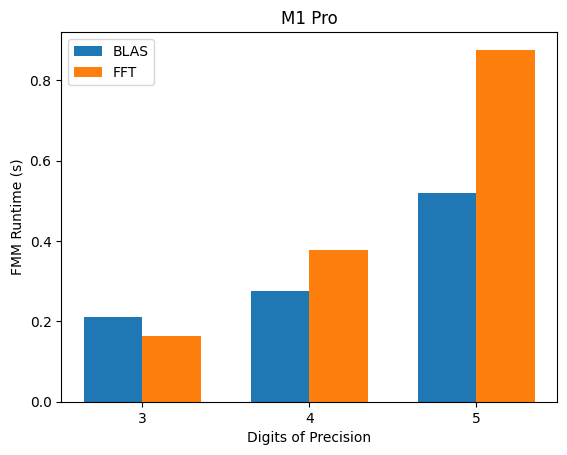

In [6]:
# Bar width
width = 0.35

fig, ax = plt.subplots()

x = np.arange(len(blas_best_times))
ax.set_title("M1 Pro")
ax.bar(x - width/2, blas_best_times, width, label='BLAS')
ax.bar(x + width/2, fft_best_times, width, label='FFT')
ax.set_ylabel('FMM Runtime (s)')
ax.set_xlabel('Digits of Precision')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([3, 4, 5])
ax.legend()

plt.show()

# Double Precision

## BLAS Field Translations

In [18]:
np.random.seed(0)
surface_diff_vec = [0, 1, 2]
svd_threshold_vec = [None, 1e-15, 1e-12, 1e-9, 1e-6, 1e-3, 1e-1]
depth_vec = [4, 5]
expansion_order_vec = [5, 6, 7, 8, 9, 10]

parameters = list(itertools.product(surface_diff_vec, svd_threshold_vec, depth_vec, expansion_order_vec))

dim = 3
dtype = np.float64
ctype = np.complex128

# Set FMM Parameters
n_vec = 1
n_crit = None
depth = 3
n_sources = 1000000
n_targets = 1000000
kernel = "laplace" 
field_translation = "blas"  
kernel_eval_type = (
    "eval"  
)

sources = np.reshape(
    np.random.rand(n_sources * dim), (n_sources, dim)
).astype(dtype)
targets = np.reshape(
    np.random.rand(n_targets * dim), (n_targets, dim)
).astype(dtype)
charges = np.reshape(
    np.random.rand(n_sources * n_vec), (n_sources, n_vec)
).astype(dtype)

rel_error = []
times = []
setup = []

for (i, (surface_diff, svd_threshold, depth, expansion_order)) in enumerate(parameters):
    tmp = [expansion_order]*(depth+1)

    s = time()
    fmm = KiFmm(
        tmp,
        sources,
        targets,
        charges,
        kernel_eval_type,
        kernel,
        field_translation,
        prune_empty=True,
        timed=True,
        svd_threshold=svd_threshold,
        surface_diff=surface_diff,
        depth=depth
    )
    setup.append(time()-s)

    s = time()
    fmm.evaluate()
    times.append(time()-s)
    print(f"Computing: {i+1}/{len(parameters)} Eval Time: {times[i]}")
        
    leaf = fmm.target_leaves[1]
    found = fmm.potentials(leaf)[0]
    targets_leaf = fmm.target_coordinates(leaf)
    expected = fmm.evaluate_kernel(sources, targets_leaf, charges)

    relative_error = np.abs(expected-found)/expected

    max_relative_error = np.max(relative_error)
    min_relative_error = np.min(relative_error)
    mean_relative_error = np.mean(relative_error)

    rel_error.append((min_relative_error, mean_relative_error, max_relative_error))


with open('accuracy_double_precision_blas.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['surface_diff', 'svd_threshold', 'depth', 'expansion_order', 'time', 'min_rel_err', 'mean_rel_err', 'max_rel_err'])
    for row in zip(parameters, times, rel_error):
        writer.writerow([row[0][0], row[0][1], row[0][2], row[0][3], row[1], row[2][0], row[2][1], row[2][2]])

## FFT Field Translations

In [19]:
np.random.seed(0)

depth_vec = [4, 5]
expansion_order_vec = [5, 6, 7, 8, 9, 10]

parameters = list(itertools.product(depth_vec, expansion_order_vec))

np.random.seed(0)

dim = 3
dtype = np.float64
ctype = np.complex128

# Set FMM Parameters
n_vec = 1
n_crit = None
n_sources = 1000000
n_targets = 1000000
kernel = "laplace" 
field_translation = "fft"  
kernel_eval_type = (
    "eval"  
)

sources = np.reshape(
    np.random.rand(n_sources * dim), (n_sources, dim)
).astype(dtype)
targets = np.reshape(
    np.random.rand(n_targets * dim), (n_targets, dim)
).astype(dtype)
charges = np.reshape(
    np.random.rand(n_sources * n_vec), (n_sources, n_vec)
).astype(dtype)

rel_error = []
times = []
setup = []


for (i, (depth, expansion_order)) in enumerate(parameters):
    tmp = [expansion_order]*(depth+1)
    s = time()
    fmm = KiFmm(
        tmp,
        sources,
        targets,
        charges,
        kernel_eval_type,
        kernel,
        field_translation,
        prune_empty=True,
        timed=True,
        depth=depth
    )
    setup.append(time()-s)

    s = time()
    fmm.evaluate()
    times.append(time()-s)
    print(f"Computing: {i+1}/{len(parameters)} Eval Time: {times[i]}")
        
    leaf = fmm.target_leaves[1]
    found = fmm.potentials(leaf)[0]
    targets_leaf = fmm.target_coordinates(leaf)
    expected = fmm.evaluate_kernel(sources, targets_leaf, charges)

    relative_error = np.abs(expected-found)/expected

    max_relative_error = np.max(relative_error)
    min_relative_error = np.min(relative_error)
    mean_relative_error = np.mean(relative_error)

    rel_error.append((min_relative_error, mean_relative_error, max_relative_error))

with open('accuracy_double_precision_fft.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['depth', 'expansion_order', 'time', 'min_rel_err', 'mean_rel_err', 'max_rel_err'])
    for row in zip(parameters, times, rel_error):
        writer.writerow([row[0][0], row[0][1], row[1], row[2][0], row[2][1], row[2][2]])

In [83]:
blas = pd.read_csv('accuracy_double_precision_blas.csv')
fft = pd.read_csv('accuracy_double_precision_fft.csv')

# Filter for max rel error with given number of digits in final solution
fft_6 = fft[(fft['max_rel_err'] < 1e-6) & (fft['max_rel_err'] > 1e-7)]
fft_7 = fft[(fft['max_rel_err'] < 1e-7) & (fft['max_rel_err'] > 1e-8)]
fft_8 = fft[(fft['max_rel_err'] < 1e-8) & (fft['max_rel_err'] > 1e-9)]
fft_9 = fft[(fft['max_rel_err'] < 1e-9) & (fft['max_rel_err'] > 1e-10)]
fft_10 = fft[(fft['max_rel_err'] < 1e-10) & (fft['max_rel_err'] > 1e-11)]


blas_6 = blas[(blas['max_rel_err'] < 1e-6) & (blas['max_rel_err'] > 1e-7)]
blas_7 = blas[(blas['max_rel_err'] < 1e-7) & (blas['max_rel_err'] > 1e-8)]
blas_8 = blas[(blas['max_rel_err'] < 1e-8) & (blas['max_rel_err'] > 1e-9)]
blas_9 = blas[(blas['max_rel_err'] < 1e-9) & (blas['max_rel_err'] > 1e-10)]
blas_10 = blas[(blas['max_rel_err'] < 1e-10) & (blas['max_rel_err'] > 1e-11)]


blas_vec = [blas_6, blas_7, blas_8, blas_9, blas_10]
fft_vec = [fft_6, fft_7, fft_8, fft_9, fft_10]

blas_best = []
fft_best = []

for (blas, fft) in zip(blas_vec, fft_vec):
    min_index = blas['time'].idxmin()
    blas_best.append(blas.loc[min_index])
    min_index = fft['time'].idxmin()
    fft_best.append(fft.loc[min_index])

blas_best_times = []
fft_best_times = []
for (blas, fft) in zip(blas_best, fft_best):
    blas_best_times.append(blas['time'])
    fft_best_times.append(fft['time'])

In [93]:
fft_best[4]

depth              5.000000e+00
expansion_order    1.000000e+01
time               9.395312e+00
min_rel_err        7.342667e-12
mean_rel_err       1.772595e-11
max_rel_err        5.670355e-11
Name: 11, dtype: float64

In [95]:
blas_best[4]

surface_diff       2.000000e+00
svd_threshold      1.000000e-09
depth              4.000000e+00
expansion_order    9.000000e+00
time               1.880748e+00
min_rel_err        1.594595e-13
mean_rel_err       1.002857e-11
max_rel_err        7.060898e-11
Name: 208, dtype: float64

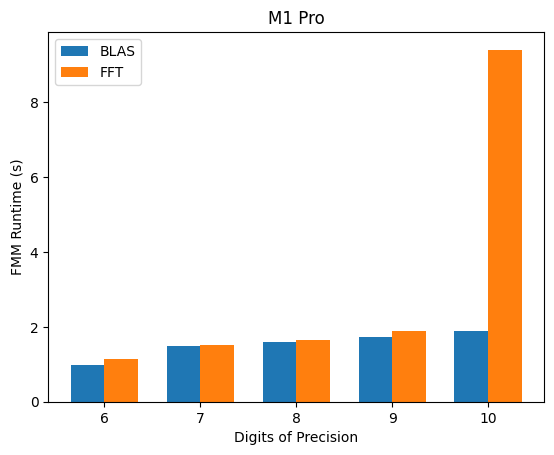

In [8]:
# Bar width
width = 0.35

fig, ax = plt.subplots()

x = np.arange(len(blas_best_times))

ax.set_title('M1 Pro')
ax.bar(x - width/2, blas_best_times, width, label='BLAS')
ax.bar(x + width/2, fft_best_times, width, label='FFT')
ax.set_ylabel('FMM Runtime (s)')
ax.set_xlabel('Digits of Precision')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([6, 7, 8, 9, 10])
ax.legend()

plt.show()